In [124]:
# Dependencies and Setup
%matplotlib notebook
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os as os
from scipy.stats import sem # <-- Standard Error of Mean

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

In [125]:
# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_df = pd.read_csv(mouse_drug_data_to_load)
mouse_df

,Mouse ID,Drug
0,f234,Stelasyn
1,x402,Stelasyn
2,a492,Stelasyn
3,w540,Stelasyn
4,v764,Stelasyn
...,...,...
245,i669,Placebo
246,r850,Placebo
247,a262,Placebo
248,q787,Placebo


In [126]:
trial_df = pd.read_csv(clinical_trial_data_to_load)
trial_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [127]:
# Combine the data into a single dataset
combined_df = pd.merge(trial_df, mouse_df, on='Mouse ID', how='outer')
# Display the data table for preview
combined_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin
...,...,...,...,...,...
1901,m601,25,33.118756,1,Capomulin
1902,m601,30,31.758275,1,Capomulin
1903,m601,35,30.834357,1,Capomulin
1904,m601,40,31.378045,1,Capomulin


## Tumor Response to Treatment

In [128]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
grp_avgs_drug_time = combined_df.groupby(['Drug','Timepoint']).mean()
grp_avgs_drug_time

Tumor Volume (mm3)  Metastatic Sites
Drug      Timepoint                                      
Capomulin 0                   45.000000          0.000000
          5                   44.266086          0.160000
          10                  43.084291          0.320000
          15                  42.064317          0.375000
          20                  40.716325          0.652174
...                                 ...               ...
Zoniferol 25                  55.432935          1.687500
          30                  57.713531          1.933333
          35                  60.089372          2.285714
          40                  62.916692          2.785714
          45                  65.960888          3.071429

[100 rows x 2 columns]

In [129]:
# Convert to DataFrame
vol_drug_time_df = pd.DataFrame(grp_avgs_drug_time, columns=['Tumor Volume (mm3)']).reset_index()
# Preview DataFrame
vol_drug_time_df

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
...,...,...,...
95,Zoniferol,25,55.432935
96,Zoniferol,30,57.713531
97,Zoniferol,35,60.089372
98,Zoniferol,40,62.916692


In [130]:
# Minor Data Munging to Re-Format the Data Frame
vol_drug_time_pvt = vol_drug_time_df.pivot('Timepoint', columns = 'Drug', values = 'Tumor Volume (mm3)')
# Preview the Data Frame
vol_drug_time_pvt

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [131]:
# Isolate specific drugs for plot
vol_drug_time_pvt_df = pd.DataFrame(vol_drug_time_pvt, columns=['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']).reset_index()
# Preview the Data Frame
vol_drug_time_pvt_df

,Timepoint,Capomulin,Infubinol,Ketapril,Placebo
0,0,45.000000,45.000000,45.000000,45.000000
1,5,44.266086,47.062001,47.389175,47.125589
2,10,43.084291,49.403909,49.582269,49.423329
3,15,42.064317,51.296397,52.399974,51.359742
4,20,40.716325,53.197691,54.920935,54.364417
5,25,39.939528,55.715252,57.678982,57.482574
6,30,38.769339,58.299397,60.994507,59.809063
7,35,37.816839,60.742461,63.371686,62.420615
8,40,36.958001,63.162824,66.068580,65.052675
9,45,36.236114,65.755562,70.662958,68.084082


<IPython.core.display.Javascript object>


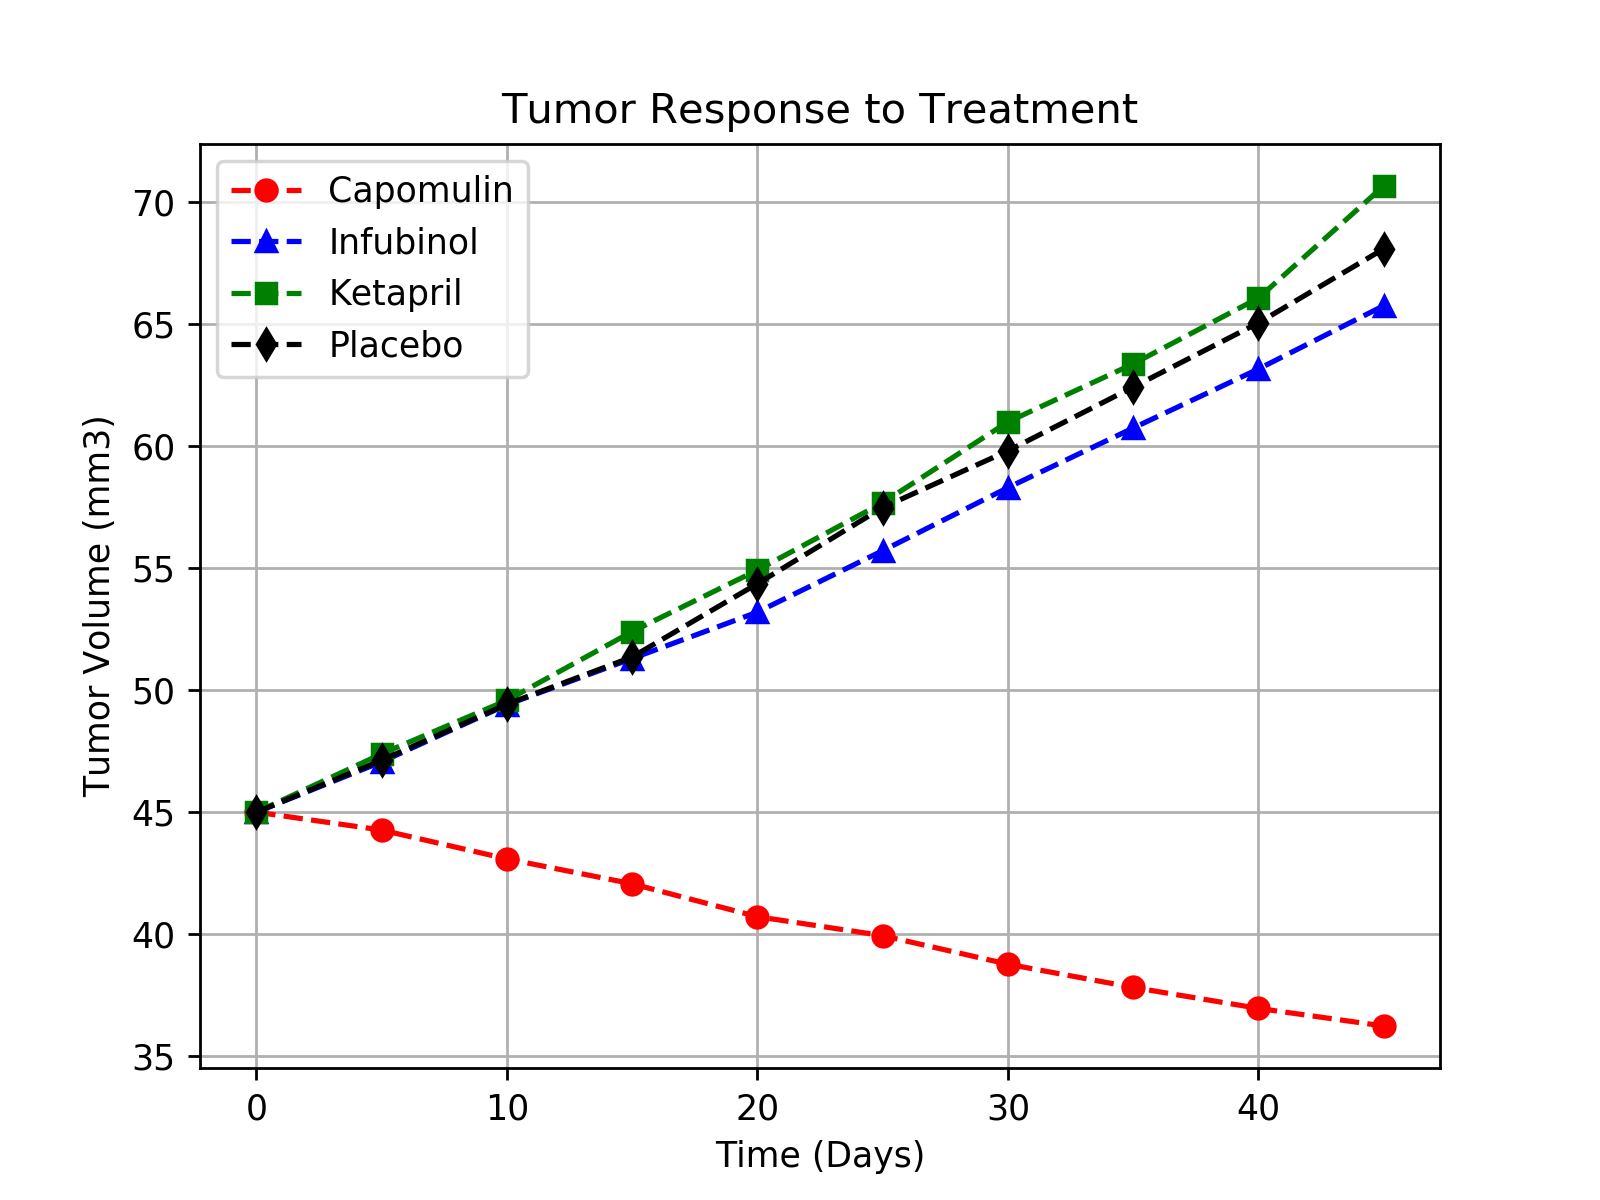

In [132]:
# Generate the Plot
fig1, ax1 = plt.subplots()

time = np.arange(0, 50, 5)
capo_vol = np.array(vol_drug_time_pvt_df.loc[:,'Capomulin'])
infu_vol = np.array(vol_drug_time_pvt_df.loc[:,'Infubinol'])
keta_vol = np.array(vol_drug_time_pvt_df.loc[:,'Ketapril'])
placebo_vol = np.array(vol_drug_time_pvt_df.loc[:,'Placebo'])

# print(time)
# print(capo_vol)

plt.plot(time, capo_vol, color="red", linestyle='--', marker ='o', label="Capomulin")
plt.plot(time, infu_vol, color="blue", linestyle='--', marker ='^', label="Infubinol")
plt.plot(time, keta_vol, color="green", linestyle='--', marker ='s', label="Ketapril")
plt.plot(time, placebo_vol, color="black", linestyle='--', marker ='d', label="Placebo")

plt.title('Tumor Response to Treatment')
plt.xlabel('Time (Days)')
plt.ylabel('Tumor Volume (mm3)')

# Show the Figure
plt.show()

plt.legend(loc='upper left')

plt.grid()

# Save the Figure
fig1.savefig("treatment_drug_time.png")

## Metastatic Response to Treatment

In [133]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
# (within same grouped 'means' df as above, re-printing here)
grp_avgs_drug_time

Tumor Volume (mm3)  Metastatic Sites
Drug      Timepoint                                      
Capomulin 0                   45.000000          0.000000
          5                   44.266086          0.160000
          10                  43.084291          0.320000
          15                  42.064317          0.375000
          20                  40.716325          0.652174
...                                 ...               ...
Zoniferol 25                  55.432935          1.687500
          30                  57.713531          1.933333
          35                  60.089372          2.285714
          40                  62.916692          2.785714
          45                  65.960888          3.071429

[100 rows x 2 columns]

In [134]:
# Convert to DataFrame
sites_drug_time_df = pd.DataFrame(grp_avgs_drug_time, columns=['Metastatic Sites']).reset_index()
# Preview DataFrame
sites_drug_time_df

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174
...,...,...,...
95,Zoniferol,25,1.687500
96,Zoniferol,30,1.933333
97,Zoniferol,35,2.285714
98,Zoniferol,40,2.785714


In [135]:
# Minor Data Munging to Re-Format the Data Frame
sites_drug_time_pvt = sites_drug_time_df.pivot('Timepoint', columns = 'Drug', values = 'Metastatic Sites')
# Preview the Data Frame
sites_drug_time_pvt

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


<IPython.core.display.Javascript object>


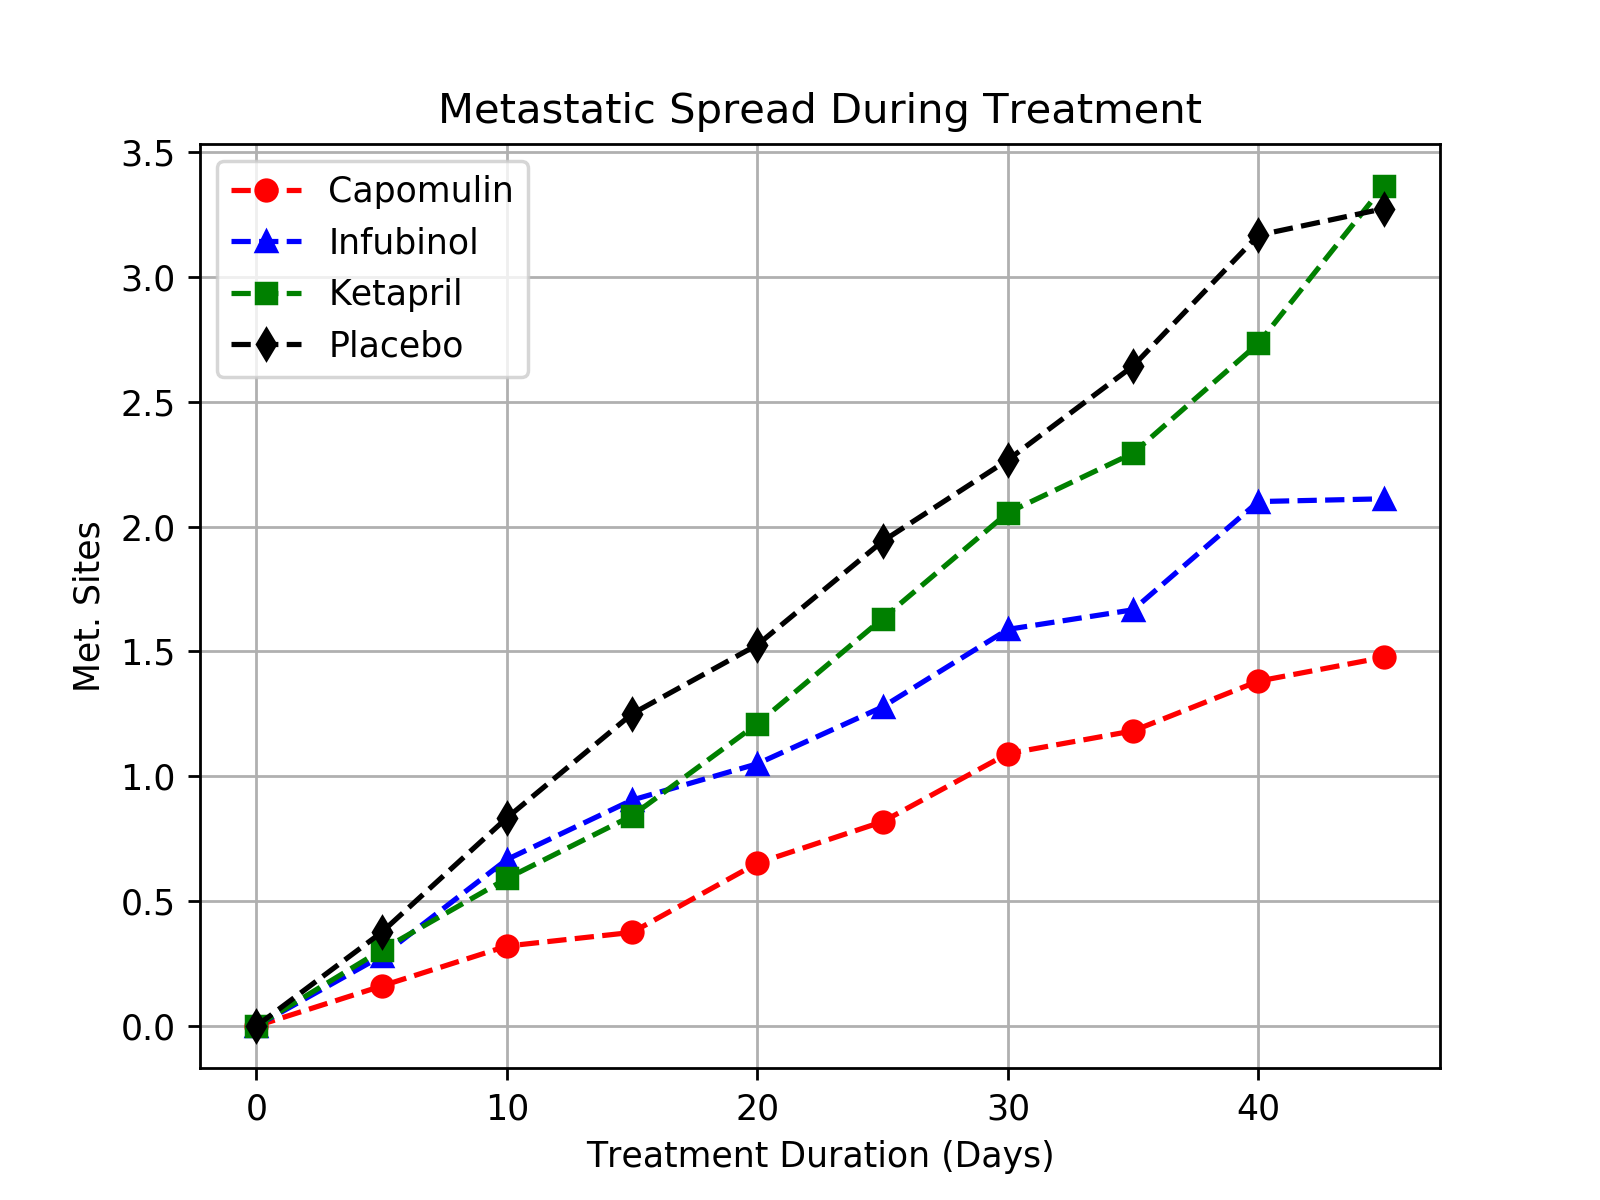

In [136]:
# Generate the Plot
fig2, ax2 = plt.subplots()

time = np.arange(0, 50, 5)
capo_sites = np.array(sites_drug_time_pvt.loc[:,'Capomulin'])
infu_sites = np.array(sites_drug_time_pvt.loc[:,'Infubinol'])
keta_sites = np.array(sites_drug_time_pvt.loc[:,'Ketapril'])
placebo_sites = np.array(sites_drug_time_pvt.loc[:,'Placebo'])

# print(time)
# print(capo_vol)

plt.plot(time, capo_sites, color="red", linestyle='--', marker ='o', label="Capomulin")
plt.plot(time, infu_sites, color="blue", linestyle='--', marker ='^', label="Infubinol")
plt.plot(time, keta_sites, color="green", linestyle='--', marker ='s', label="Ketapril")
plt.plot(time, placebo_sites, color="black", linestyle='--', marker ='d', label="Placebo")

plt.title('Metastatic Spread During Treatment')
plt.xlabel('Treatment Duration (Days)')
plt.ylabel('Met. Sites')

# Show the Figure
plt.show()

plt.legend(loc='upper left')

plt.grid()

# Save the Figure
fig2.savefig("spread_drug_time.png")


## Survival Rates

In [137]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
grp_cts_drug_time = combined_df.groupby(['Drug','Timepoint']).count()
grp_cts_drug_time

Mouse ID  Tumor Volume (mm3)  Metastatic Sites
Drug      Timepoint                                                
Capomulin 0                25                  25                25
          5                25                  25                25
          10               25                  25                25
          15               24                  24                24
          20               23                  23                23
...                       ...                 ...               ...
Zoniferol 25               16                  16                16
          30               15                  15                15
          35               14                  14                14
          40               14                  14                14
          45               14                  14                14

[100 rows x 3 columns]

In [138]:
# Convert to DataFrame
mice_drug_time_df = pd.DataFrame(grp_cts_drug_time, columns=['Mouse ID']).reset_index()
# Preview DataFrame
mice_drug_time_df

,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23
...,...,...,...
95,Zoniferol,25,16
96,Zoniferol,30,15
97,Zoniferol,35,14
98,Zoniferol,40,14


In [139]:
# Minor Data Munging to Re-Format the Data Frame
mice_drug_time_pvt = mice_drug_time_df.pivot('Timepoint', columns = 'Drug', values = 'Mouse ID')
# Preview the Data Frame
mice_drug_time_pvt

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


In [140]:
# Isolate specific drugs for plot
mice_drug_time_pvt_df = pd.DataFrame(mice_drug_time_pvt, columns=['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']).reset_index()
# Preview the Data Frame
mice_drug_time_pvt_df

,Timepoint,Capomulin,Infubinol,Ketapril,Placebo
0,0,25,25,25,25
1,5,25,25,23,24
2,10,25,21,22,24
3,15,24,21,19,20
4,20,23,20,19,19
5,25,22,18,19,17
6,30,22,17,18,15
7,35,22,12,17,14
8,40,21,10,15,12
9,45,21,9,11,11


<IPython.core.display.Javascript object>


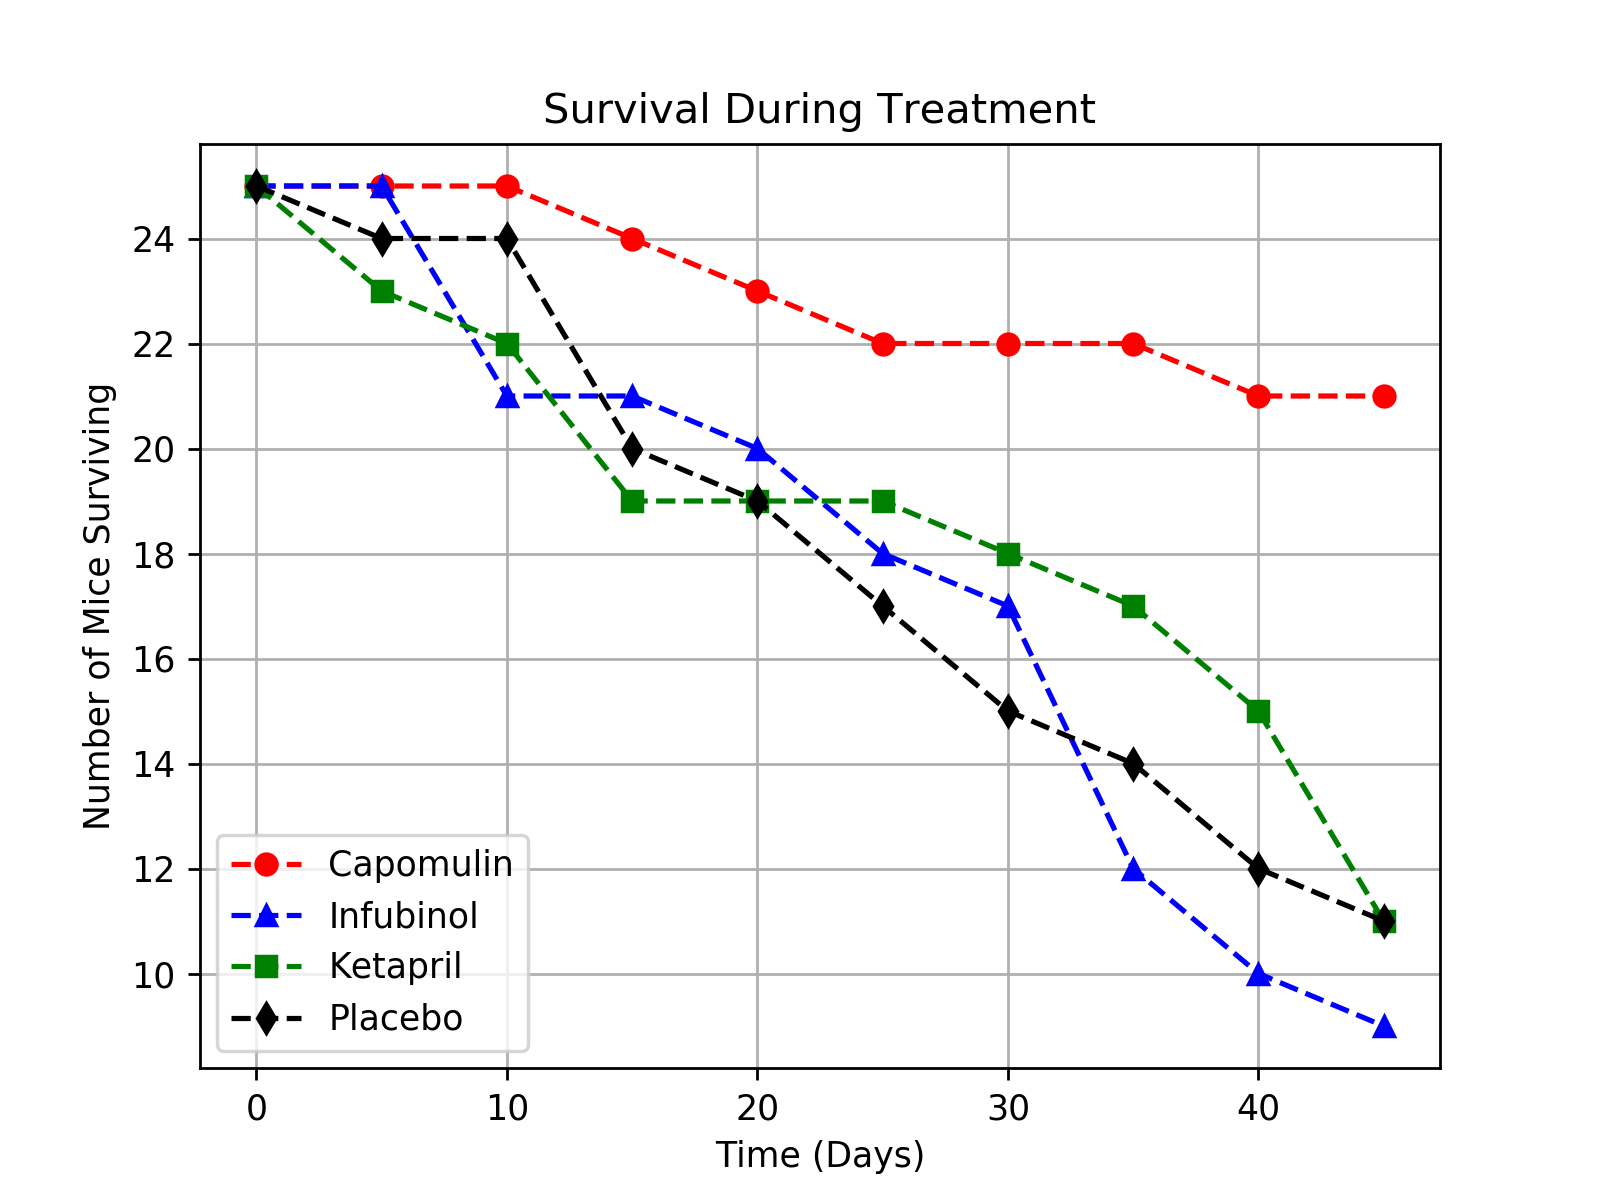

In [141]:
# Generate the Plot
fig3, ax3 = plt.subplots()

time = np.arange(0, 50, 5)
capo_mice = np.array(mice_drug_time_pvt.loc[:,'Capomulin'])
infu_mice = np.array(mice_drug_time_pvt.loc[:,'Infubinol'])
keta_mice = np.array(mice_drug_time_pvt.loc[:,'Ketapril'])
placebo_mice = np.array(mice_drug_time_pvt.loc[:,'Placebo'])

# print(time)
# print(capo_vol)

plt.plot(time, capo_mice, color="red", linestyle='--', marker ='o', label="Capomulin")
plt.plot(time, infu_mice, color="blue", linestyle='--', marker ='^', label="Infubinol")
plt.plot(time, keta_mice, color="green", linestyle='--', marker ='s', label="Ketapril")
plt.plot(time, placebo_mice, color="black", linestyle='--', marker ='d', label="Placebo")

plt.title('Survival During Treatment')
plt.xlabel('Time (Days)')
plt.ylabel('Number of Mice Surviving')

# Show the Figure
plt.show()

plt.legend(loc='bottom left')

plt.grid()

# Save the Figure
fig3.savefig("survival_drug_time.png")

# Observations and Insights

The drug Capomulin looks to be the most successful (effective) treatment during this clinical trial (of the 4 treatments plotted) because: 
    
    * Capomulin actually reduced tumor volume over time as compared to other drugs treatments, whereas the tumor volumes of the Infubinol and Ketapril treatments continued to increase at nearly the same rate as a Placebo (i.e., no drug) during the course of treatment.
    
    * Capomulin's number of metastatic (cancer spreading) sites remained lowest over time as compared to other treatments plotted, only increasing to 1.5 sites whereas the other treatments plotted increased to more than 2+ sites by the end of the trial.
    
    * Capomulin's number of mice surviving (still alive) through the course of the trial remained the highest as compared to other treatments plotted, only losing 4 mice (starting at 25 and dropping to 21) whereas the other treatments plotted all lost more than half their mice (12+) by the end of the trial.